# Welcome to Exploratory data analysis of the Colombian Institute of Family Welfare (ICBF)

### By following the next python code, you will be able to do an initial exploratory data analysis of the information regarding the Colombian childhood focused on health attributes and some social aspects.

In [2]:
#!pip install pandasql
#!pip install motionchart
#!pip install pyperclip
#!pip install missingno
#!pip install plotly

import pandas as pd
import requests
from io import StringIO
import pandasql as ps
import time
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
import plotly.express as px
from motionchart.motionchart import MotionChart, MotionChartDemo

In [ ]:
#sharing url from the csv file
orig_url='https://drive.google.com/file/d/1PbRUlPfQjLBcZVv2SrpAc4ybYnD5oRlM/view?usp=sharing'
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
ICBF_municipios  = pd.read_csv(csv_raw,sep=";")

Missing analysis

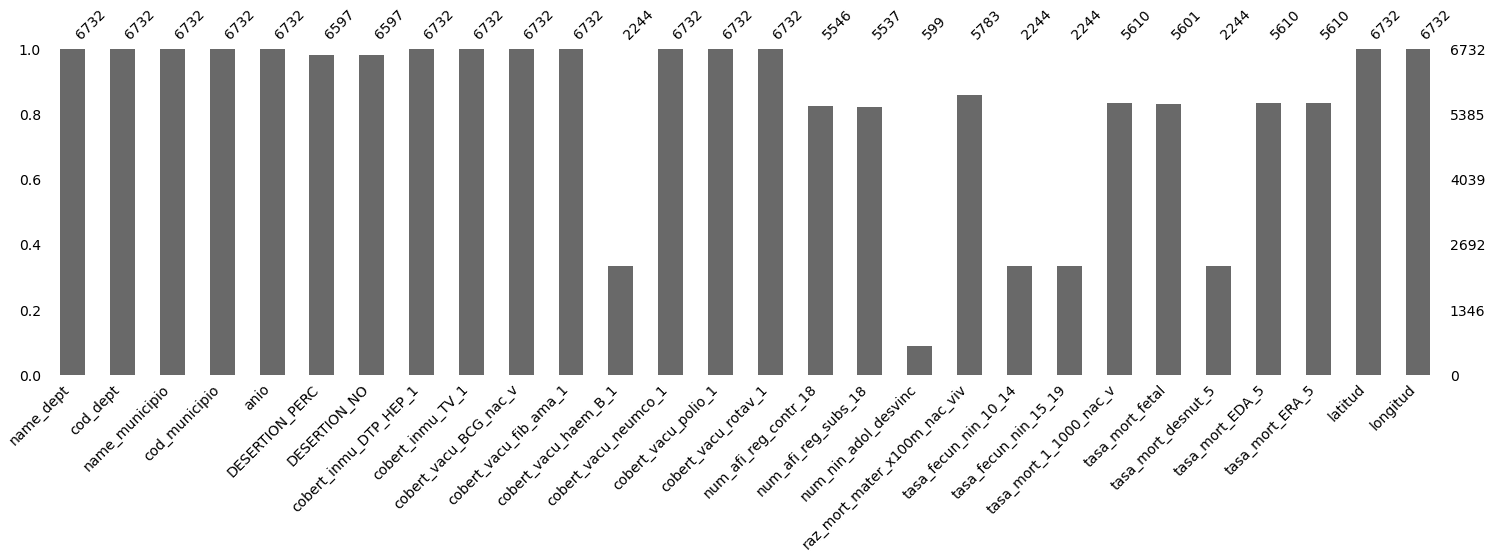

In [10]:
msno.bar(ICBF_municipios, labels=True, figsize=(25,6), fontsize=14)

In [11]:
#ICBF_municipios_2016=info_departamentos.dropna().copy()
ICBF_municipios_2016=ICBF_municipios.loc[ICBF_municipios['anio']==2016]
ICBF_municipios_2016=ICBF_municipios_2016.drop(['num_nin_adol_desvinc'], axis=1)
#Creacion de porcentajes
#info_departamentos_nomiss['%NP_HOMBRES']=round(info_departamentos_nomiss['NP_HOMBRES']/info_departamentos_nomiss['NP_PERSONAS'],4)


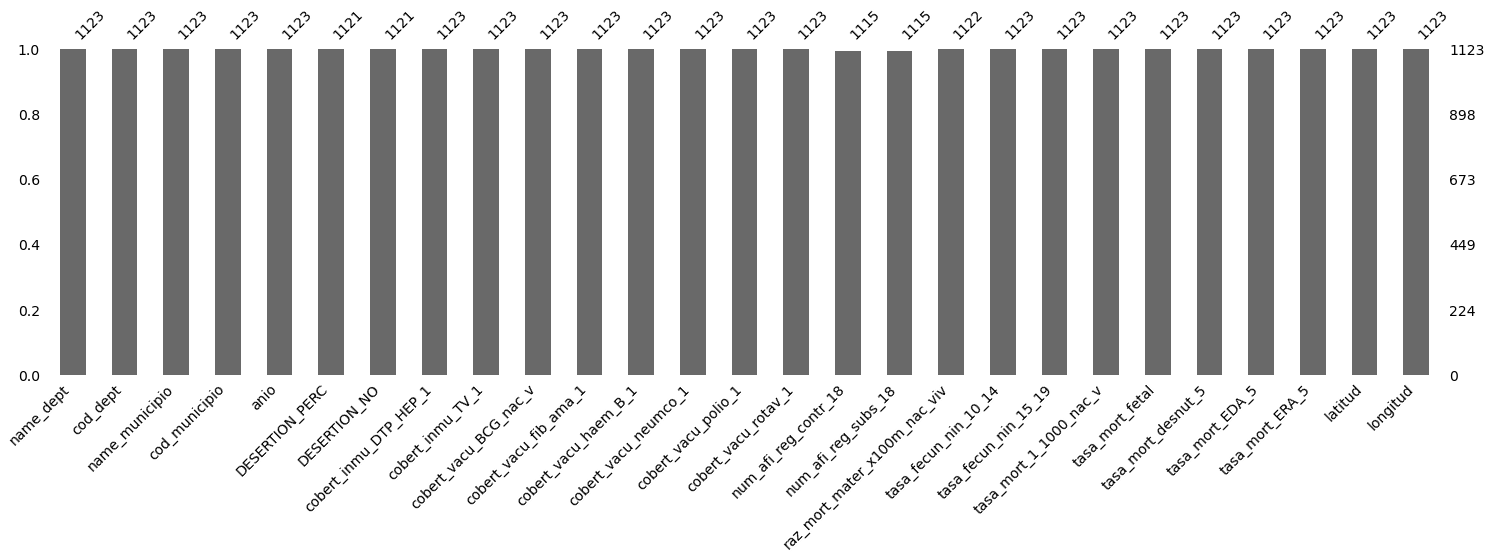

In [8]:
msno.bar(ICBF_municipios_2016, labels=True, figsize=(25,6), fontsize=14)

Text(0, 0.5, '')

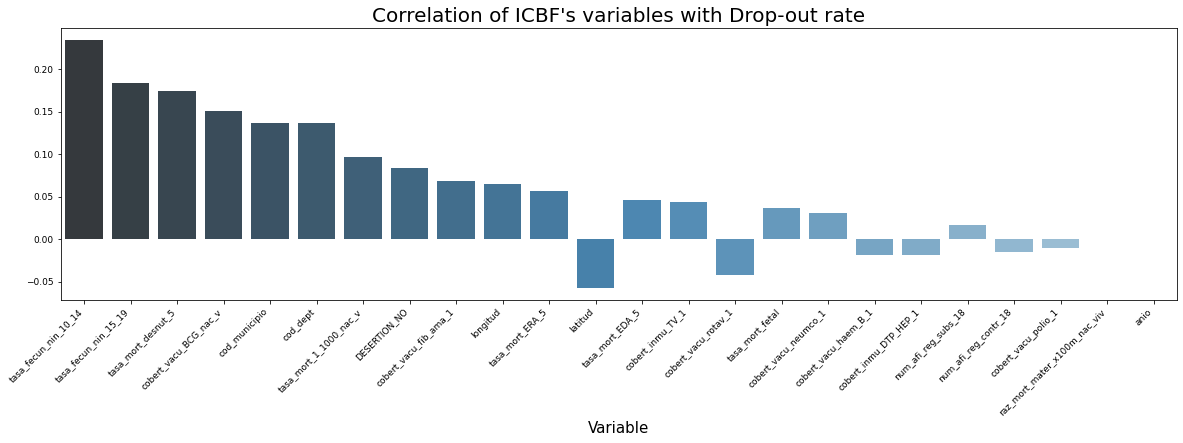

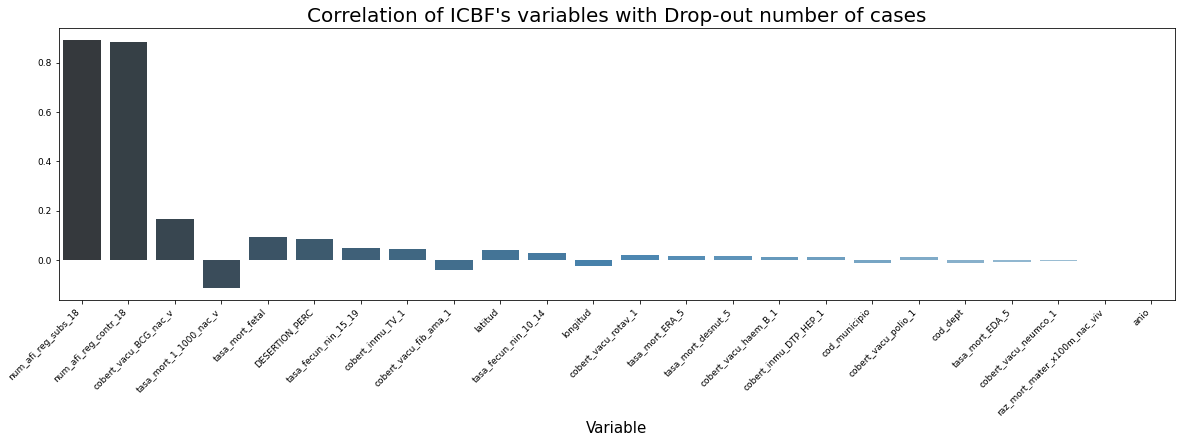

In [14]:
corr=ICBF_municipios_2016[ICBF_municipios_2016.columns[1:]].corr()['DESERTION_PERC'][:].reset_index(name='LINEAR_CORRELATION')
corr=corr.reindex(corr.LINEAR_CORRELATION.abs().sort_values(ascending=False).index)
corr=corr.loc[corr['index']!= 'DESERTION_PERC']
#corr=corr.loc[abs(corr['LINEAR_CORRELATION'])>0.2]
corr
plt.figure(figsize=(20, 5))
b = sns.barplot(x="index", y="LINEAR_CORRELATION", data=corr,capsize=5,palette="Blues_d")
b.axes.set_title("Correlation of ICBF's variables with Drop-out rate",fontsize=20)
b.set_xticklabels(b.get_xticklabels(), rotation=45, horizontalalignment='right')
b.set_xlabel("Variable",fontsize=15)
b.tick_params(labelsize=9)
b.set_ylabel("")

corr_1=ICBF_municipios_2016[ICBF_municipios_2016.columns[1:]].corr()['DESERTION_NO'][:].reset_index(name='LINEAR_CORRELATION')
corr_1=corr_1.reindex(corr_1.LINEAR_CORRELATION.abs().sort_values(ascending=False).index)
corr_1=corr_1.loc[corr_1['index']!= 'DESERTION_NO']
#corr_1=corr_1.loc[abs(corr_1['LINEAR_CORRELATION'])>0.5]

plt.figure(figsize=(20, 5))
b = sns.barplot(x="index", y="LINEAR_CORRELATION", data=corr_1,capsize=5,palette="Blues_d")
b.axes.set_title("Correlation of ICBF's variables with Drop-out number of cases",fontsize=20)
b.set_xticklabels(b.get_xticklabels(), rotation=45, horizontalalignment='right')
b.set_xlabel("Variable",fontsize=15)
b.tick_params(labelsize=9)
b.set_ylabel("")

In [17]:
fig = px.scatter(ICBF_municipios_2016, x="tasa_fecun_nin_10_14", y="DESERTION_NO", animation_frame="anio",hover_name="name_municipio")
fig.show()

In [21]:
fig = px.scatter(ICBF_municipios_2016, x="tasa_fecun_nin_10_14", y="DESERTION_PERC", animation_frame="anio",hover_name="name_municipio",color="name_dept")
fig.show()

In [23]:
ICBF_municipios_nomiss=ICBF_municipios.drop(['cobert_vacu_haem_B_1','num_nin_adol_desvinc','tasa_fecun_nin_10_14','tasa_fecun_nin_15_19','tasa_mort_desnut_5'], axis=1)
ICBF_municipios_nomiss=ICBF_municipios_nomiss.loc[ICBF_municipios_nomiss['anio']>=2012]


Text(0, 0.5, '')

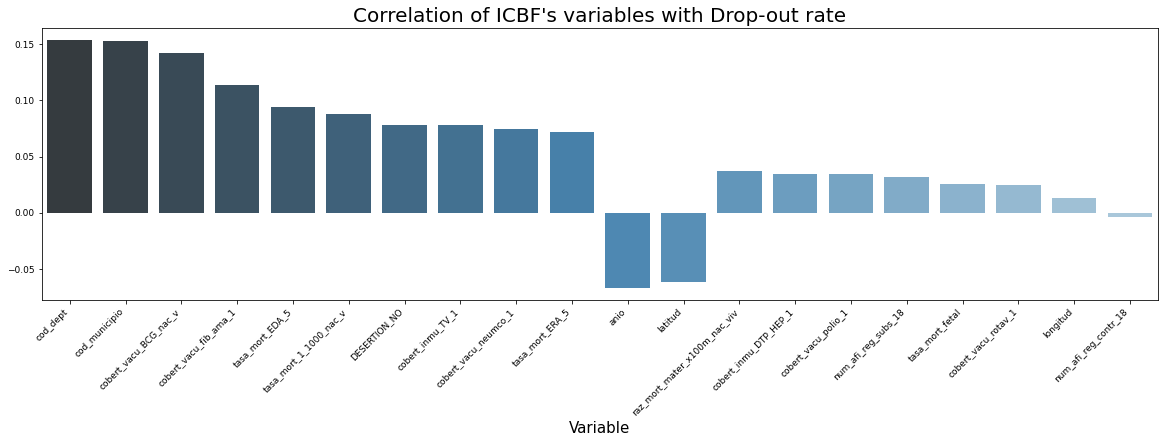

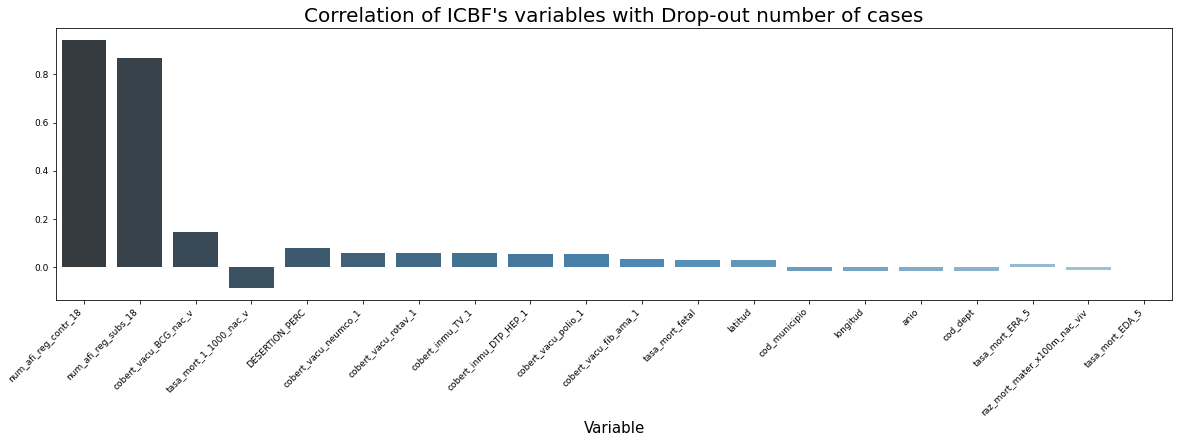

In [24]:
corr=ICBF_municipios_nomiss[ICBF_municipios_nomiss.columns[1:]].corr()['DESERTION_PERC'][:].reset_index(name='LINEAR_CORRELATION')
corr=corr.reindex(corr.LINEAR_CORRELATION.abs().sort_values(ascending=False).index)
corr=corr.loc[corr['index']!= 'DESERTION_PERC']
#corr=corr.loc[abs(corr['LINEAR_CORRELATION'])>0.2]
corr
plt.figure(figsize=(20, 5))
b = sns.barplot(x="index", y="LINEAR_CORRELATION", data=corr,capsize=5,palette="Blues_d")
b.axes.set_title("Correlation of ICBF's variables with Drop-out rate",fontsize=20)
b.set_xticklabels(b.get_xticklabels(), rotation=45, horizontalalignment='right')
b.set_xlabel("Variable",fontsize=15)
b.tick_params(labelsize=9)
b.set_ylabel("")

corr_1=ICBF_municipios_nomiss[ICBF_municipios_nomiss.columns[1:]].corr()['DESERTION_NO'][:].reset_index(name='LINEAR_CORRELATION')
corr_1=corr_1.reindex(corr_1.LINEAR_CORRELATION.abs().sort_values(ascending=False).index)
corr_1=corr_1.loc[corr_1['index']!= 'DESERTION_NO']
#corr_1=corr_1.loc[abs(corr_1['LINEAR_CORRELATION'])>0.5]

plt.figure(figsize=(20, 5))
b = sns.barplot(x="index", y="LINEAR_CORRELATION", data=corr_1,capsize=5,palette="Blues_d")
b.axes.set_title("Correlation of ICBF's variables with Drop-out number of cases",fontsize=20)
b.set_xticklabels(b.get_xticklabels(), rotation=45, horizontalalignment='right')
b.set_xlabel("Variable",fontsize=15)
b.tick_params(labelsize=9)
b.set_ylabel("")

In [27]:
fig = px.scatter(ICBF_municipios_nomiss, x="cobert_vacu_polio_1", y="DESERTION_PERC", animation_frame="anio",hover_name="name_municipio",color="name_dept")
fig.show()

In [ ]:
#info_departamentos_2016=info_departamentos.loc[info_departamentos['corte_anio']==2016]
#info_departamentos_2016['%Hombres']=round(info_departamentos_2016['PER001_1']/info_departamentos_2016['PER001_T'],2)
#info_departamentos_2016['%Mujeres']=round(info_departamentos_2016['PER001_2']/info_departamentos_2016['PER001_T'],2)
#info_departamentos_2016.head()
#info_departamentos_2016=info_departamentos_2016.sort_values(by=['%Mujeres'],ascending=False)
#barlist=info_departamentos_2016.plot.bar(x = 'depto_nombre', y = ['%Hombres', '%Mujeres'], rot = 40,figsize=(15,3), color = ['b','r'])

ICBF_municipios.columns


In [35]:
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.show()

In [41]:
mChart = MotionChart(df = ICBF_municipios_nomiss)
#mChart.to_notebook()

In [45]:
#mChart.to_notebook()
mChart.to_browser()